In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

import pygam

plt.style.use("tableau-colorblind10")

F_SHOW = False


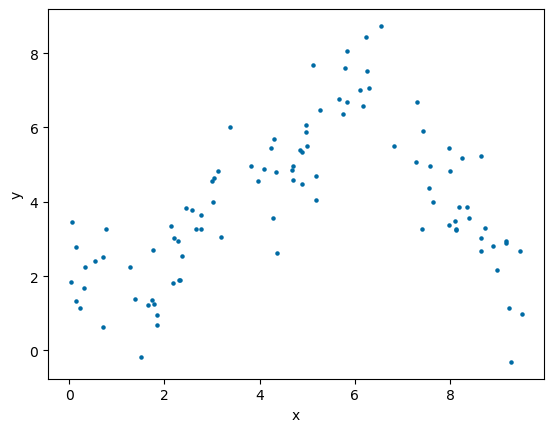

In [2]:
N = 100
rng = np.random.default_rng(123)

x = rng.uniform(0, 10, size=N)


def f(x):
    return 1 + np.cos(x * 2) + x * np.sin(x / 3)


eps = rng.normal(loc=0, scale=1.0, size=N)
y = f(x) + eps

x_line = np.linspace(x.min(), x.max())
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
    plt.legend()
plt.scatter(x, y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
df = pd.DataFrame.from_dict({"y": y, "x": x})
df.to_csv("toy_data.csv", index=False)


# OLS

In [4]:
ols = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.45
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00103
Time:                        09:53:14   Log-Likelihood:                -204.47
No. Observations:                 100   AIC:                             412.9
Df Residuals:                      98   BIC:                             418.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8534      0.372      7.663      0.000       2.114       3.592
x1             0.2264      0.067      3.385      0.001       0.094       0.359
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.113
Skew:                           0.057   Prob(JB):                        0.945
Kurtosis:                       2.881   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

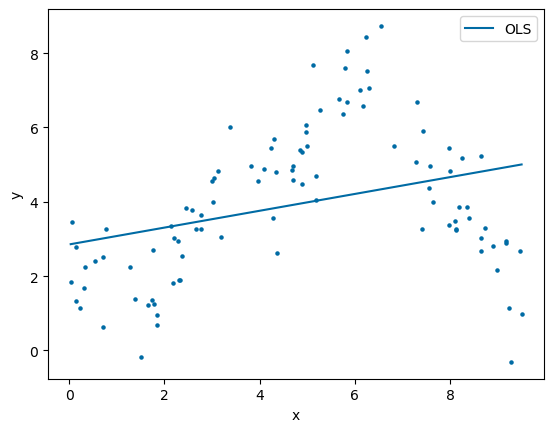

In [5]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(x_line, ols.predict(sm.add_constant(x_line)), label="OLS")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# GAM

summaryにいろいろと注意書きが出てくるので、使用する際は良く読んでおくこと！

In [6]:
model = pygam.LinearGAM(terms=pygam.s(0)).fit(X=x.reshape(N,1), y=y)
model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.9093
Link Function:                     IdentityLink Log Likelihood:                                  -127.2935
Number of Samples:                          100 AIC:                                              276.4057
                                                AICc:                                             279.3554
                                                GCV:                                                1.0028
                                                Scale:                                              0.8257
                                                Pseudo R-Squared:                                   0.8095
Feature Function                  Lam

/tmp/ipykernel_993/623937883.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model.summary()


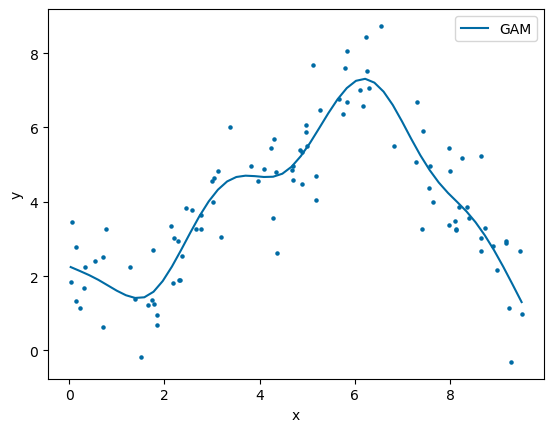

In [7]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    model.predict(x_line),
    label="GAM"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# チューニング

In [8]:
model_tuned = pygam.LinearGAM(terms=pygam.s(0)).gridsearch(X=x.reshape(N,1), y=y, lam=np.logspace(-3,5,5))
print(model.lam, model_tuned.lam)
model_tuned.summary()

  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 60% (3 of 5) |###############           | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


[[0.6]] [[0.1]]
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      13.137
Link Function:                     IdentityLink Log Likelihood:                                    -125.46
Number of Samples:                          100 AIC:                                               279.194
                                                AICc:                                             284.2373
                                                GCV:                                                1.0796
                                                Scale:                                              0.8278
                                                Pseudo R-Squared:                                   0.8158
Feature Function     

/tmp/ipykernel_993/136065913.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_tuned.summary()


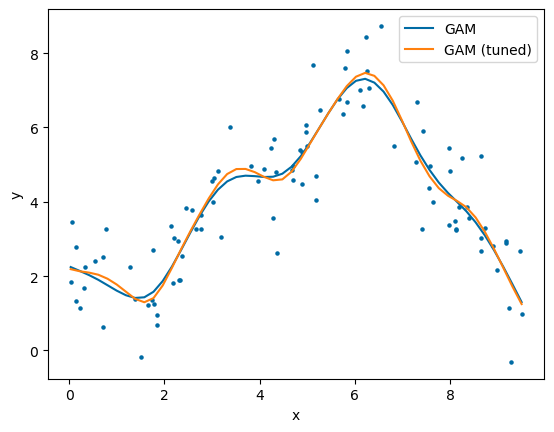

In [9]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    model.predict(x_line),
    label="GAM"
)
plt.plot(
    x_line,
    model_tuned.predict(x_line),
    label="GAM (tuned)"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
